In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from general_utils import utils
from general_utils.OverallDetailComparisonPlot import OverallDetailComparisonPlot
utils.default_plot_format()

data_path = "processed_data/outliers_10min_Nabian_2025_02_27.pkl"
result_path = "processed_data/outliers_10min_Nabian_2025_02_27.pkl"

In [24]:
pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]

data.head()

,t_start,t_end,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),ULF Power,ULF Peak Frequency,VLF Power,VLF Peak Frequency,...,UCr (g),UACR (mg÷g),Complications,Nephropathy,Retinopathy and cataract,DPN,Heart Disease,atherosclerosis or stenosis,Carotid Plaque,Condition
0,0.764,600.396,59.953222,50.339557,4.161567,81.746048,0.004173,0.000000,3.314667,0.030018,...,NaN,NaN,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes
1,4203.136,4802.628,90.358098,79.959504,8.939974,78.356643,0.004293,0.001668,3.619761,0.036698,...,11.64,26.460481,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes
2,4803.500,5403.336,105.660452,109.181706,13.784135,76.909247,0.004713,0.001667,1.729678,0.030008,...,11.64,26.460481,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes
3,5404.116,6003.788,95.765621,98.846214,17.489987,74.943543,0.000724,0.001668,1.791187,0.036687,...,11.64,26.460481,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes
4,6004.580,6604.576,80.267227,68.223672,8.035714,78.397039,0.007215,0.001667,2.201029,0.035000,...,11.64,26.460481,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes


# Helper Func


In [34]:
class cleaner():
    def __init__(self, data):
        self.data = data
        self.copy = data.copy()
        self.removed = pd.DataFrame()

    def upper(self, metric, threshold, ids =None):
        if ids is None:
            ids = self.data.id.unique()
        id_mask = self.data["id"].isin(ids)
        metric_mask = self.data[metric] > threshold
        outliers = (id_mask & metric_mask)
        
        self.removed = pd.concat([self.removed, self.data[outliers]])
        self.data = self.data[~outliers]

        return self
    
    def draw_metric(self, metric):
        self.data.sort_values(by=["id", metric], inplace=True)
        self.data.reset_index(drop=True, inplace=True)
        
        fig, ax = plt.subplots(figsize=(13, 6))
        sns.stripplot(x='id', y=metric, hue='DPN', data=self.data, palette='viridis', jitter=True, alpha=0.7, ax=ax)
        ax.set_title(f'Distribution of {metric} by ID and DPN Status')
        ax.set_xlabel('ID')
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=90)
        # Add a Add grid a to grid the to plot the to plot better to visualize better the visualize data the points data points
        ax.grid(axis='y', linestyle = 'dashed', alpha = 0.5)

 
        
        plt.tight_layout()
        plt.show()
        return self

cleaner = cleaner(data)

## SDRR

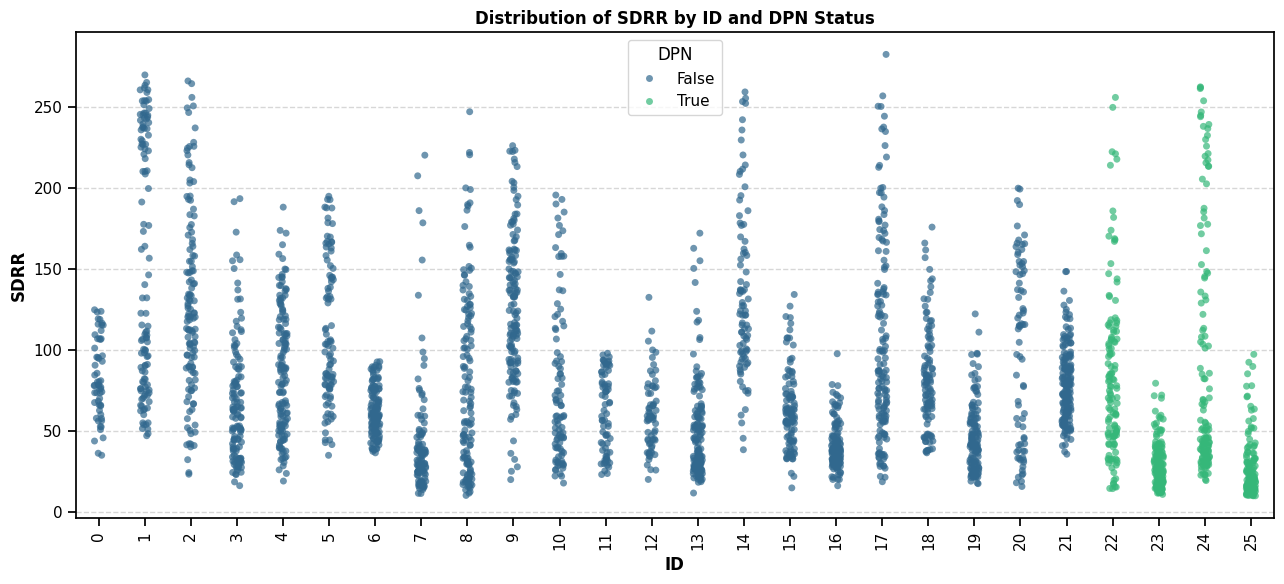

In [40]:
cleaner.upper("SDRR", 310)

upper_removal =[
[200, [3,4,5,10,20,13]],
[100, [11]],
[95, [6]],
[150, [0]],
[270, [2]],
[270, [19]],
[110,[25]]
]

for threshold, ids in upper_removal:
    cleaner.upper("SDRR", threshold, ids)

cleaner.draw_metric("SDRR");